> # Imports

In [46]:
#my modules
import acquire as ac
import prepare as pp
import explore as ex

#standard
import pandas as pd
import numpy as np
import re

#scraping
import requests
from requests import get
from bs4 import BeautifulSoup

#file
import os
import json
from typing import Dict, List, Optional, Union, cast

#vizz
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#preprocess
from sklearn.feature_extraction.text import CountVectorizer

#split and model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Acquire

In [2]:
#get the data
click_data = ac.button_click()
click_data

json file found and loaded


,string
0,sindresorhus / awesome
1,vinta / awesome-python
2,awesome-selfhosted / awesome-selfhosted
3,avelino / awesome-go
4,trimstray / the-book-of-secret-knowledge
...,...
735,hetznercloud / awesome-hcloud
736,chinaBerg / awesome-canvas
737,RichardLitt / awesome-conferences
738,styfle / awesome-desktop-js


## Prepare

In [3]:
#no duplicated repos
click_data[click_data.duplicated()]

,string


In [4]:
#cleaned the data and changed from a df to a list!
ac.REPOS

['sindresorhus/awesome',
 'vinta/awesome-python',
 'awesome-selfhosted/awesome-selfhosted',
 'avelino/awesome-go',
 'trimstray/the-book-of-secret-knowledge',
 'papers-we-love/papers-we-love',
 '521xueweihan/HelloGitHub',
 'Hack-with-Github/Awesome-Hacking',
 'jaywcjlove/awesome-mac',
 'enaqx/awesome-react',
 'DopplerHQ/awesome-interview-questions',
 'MunGell/awesome-for-beginners',
 'sindresorhus/awesome-nodejs',
 'prakhar1989/awesome-courses',
 'Solido/awesome-flutter',
 'fffaraz/awesome-cpp',
 'wasabeef/awesome-android-ui',
 'binhnguyennus/awesome-scalability',
 'vsouza/awesome-ios',
 'tiimgreen/github-cheat-sheet',
 'dypsilon/frontend-dev-bookmarks',
 'akullpp/awesome-java',
 'brillout/awesome-react-components',
 'serhii-londar/open-source-mac-os-apps',
 'rust-unofficial/awesome-rust',
 'dkhamsing/open-source-ios-apps',
 'DovAmir/awesome-design-patterns',
 'ziadoz/awesome-php',
 'goabstract/Awesome-Design-Tools',
 'alebcay/awesome-shell',
 'herrbischoff/awesome-macos-command-line',


In [5]:
scraped = ac.get_scraped_data()

json file found and loaded


In [6]:
#GOT THE DATA! Look at it...
scraped

,repo,language,readme_contents
0,sindresorhus/awesome,None,"<div align=""center"">\n\t<a href=""https://vshym..."
1,vinta/awesome-python,Python,# Awesome Python [![Awesome](https://cdn.rawgi...
2,awesome-selfhosted/awesome-selfhosted,Makefile,# Awesome-Selfhosted\n\n[![Awesome](https://cd...
3,avelino/awesome-go,Go,"# Awesome Go\n\n<a href=""https://awesome-go.co..."
4,trimstray/the-book-of-secret-knowledge,None,"<p align=""center"">\n <a href=""https://github...."
...,...,...,...
735,hetznercloud/awesome-hcloud,None,# Awesome Hetzner Cloud\n\nA curated list of l...
736,chinaBerg/awesome-canvas,None,![](./assets/logo.png)\n## awesome-canvas\nLis...
737,RichardLitt/awesome-conferences,Ruby,# Awesome Conferences [![Awesome](https://cdn....
738,styfle/awesome-desktop-js,None,"<img width=""128"" height=""128"" src=""https://cd..."


In [7]:
#readme_contents looks like what I need.. but how many did I grab?
len(scraped)

740

In [8]:
#clean the readme
df = pp.clean_df(scraped, 'readme_contents')
df

,repo,language,readme
0,sindresorhus/awesome,other,div align center href http vshymanskyy standwi...
1,vinta/awesome-python,python,awesome python awesome http cdn rawgit sindres...
2,awesome-selfhosted/awesome-selfhosted,other,awesome selfhosted awesome http cdn jsdelivr n...
3,avelino/awesome-go,go,awesome go href http awesome go img align righ...
4,trimstray/the-book-of-secret-knowledge,other,p align center href http trimstray book secret...
...,...,...,...
735,hetznercloud/awesome-hcloud,other,awesome hetzner cloud curated list library too...
736,chinaBerg/awesome-canvas,other,asset logo png awesome canvas list awesome htm...
737,RichardLitt/awesome-conferences,other,awesome conference awesome http cdn rawgit sin...
738,styfle/awesome-desktop-js,other,img width height src http cdn jsdelivr net npm...


## Explore

In [12]:
#checking for nulls
df.isnull().sum()

repo        0
language    0
readme      0
dtype: int64

In [13]:
#counts and frequencies of languages
freq = ex.show_counts_and_ratios(df, 'language')
freq

,n,percent
other,599,0.81
python,40,0.05
javascript,36,0.05
html,25,0.03
shell,19,0.03
java,11,0.01
go,10,0.01


In [14]:
# #lowering all the languages
# df['language'] = pp.lower_everything(df['language'])

## 1. What are the most common words in READMEs?

In [15]:
#grabbing a df to get the most common words in all
word_counts = ex.get_words(df)
word_counts

Unfiltered Data:187422 words  Filtered Data: 4000 words



,all,python,javascript,html,shell,java,go,other
http,216403,13261,11087,5400,6164,2811,4422,173258
img,22653,2659,1573,112,268,1171,131,16739
code,14546,1457,534,242,198,209,276,11630
awesome,13657,412,926,309,369,43,113,11485
source,12573,408,783,217,146,121,107,10791
...,...,...,...,...,...,...,...,...
pastebin,76,6,3,0,4,0,0,63
demonstrate,76,3,1,3,0,1,0,68
degree,76,4,3,4,4,0,0,61
overhead,76,0,5,4,4,3,3,57


In [16]:
#top 10 most common words
word_counts['all'].sort_values(ascending=False).head(20)

http       216403
img         22653
code        14546
awesome     13657
source      12573
star        12353
data        11898
web         11368
tool        11035
library     11006
href        10385
shield      10256
open         9669
go           9634
svg          9286
html         8824
style        8661
badge        8569
python       8293
image        8176
Name: all, dtype: int64

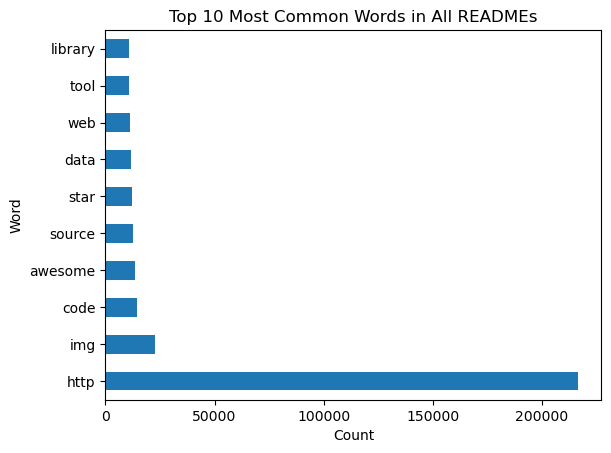

In [17]:
#vizz
word_counts['all'].sort_values(ascending=False).head(10).plot.barh()
plt.title('Top 10 Most Common Words in All READMEs')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

The top 10 most common words across all README's are above.

## 3. Do different programming languages use a different number of unique words?

In [18]:
#looking at all unique words per language
word_counts.nunique()

all           1147
python         272
javascript     257
html           187
shell          180
java           125
go             146
other         1098
dtype: int64

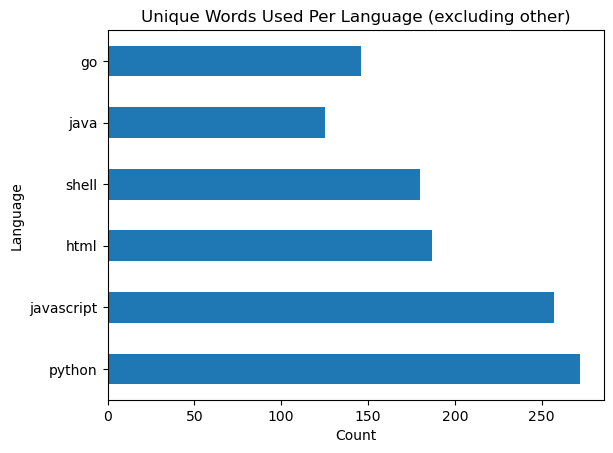

In [19]:
#vizz
word_counts.drop(columns={'all', 'other'}).nunique().plot.barh()
plt.title('Unique Words Used Per Language (excluding other)')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

Yes, different languages use different amounts of unique words in their READMEs. With Python containing the most and Java containing the least.

## 4. Are there any words that uniquely identify a programming language?

In [27]:
word_counts['python'].sort_values(ascending=False).head(15)

http      13261
img        2659
yes        1766
px         1707
li         1530
src        1480
code       1457
width      1430
image      1383
api        1268
badge      1231
star       1211
shield     1200
data       1087
ago        1000
Name: python, dtype: int64

In [44]:
word_counts.sort_values('python', ascending=False).head(20).apply(lambda row: row/row['all'], axis=1).round(2)

,all,python,javascript,html,shell,java,go,other
http,1.0,0.06,0.05,0.02,0.03,0.01,0.02,0.80
img,1.0,0.12,0.07,0.00,0.01,0.05,0.01,0.74
yes,1.0,0.94,0.00,0.00,0.00,0.00,0.00,0.05
px,1.0,0.55,0.01,0.00,0.00,0.00,0.04,0.40
li,1.0,0.42,0.00,0.01,0.00,0.00,0.00,0.57
src,1.0,0.19,0.05,0.01,0.02,0.00,0.01,0.72
code,1.0,0.10,0.04,0.02,0.01,0.01,0.02,0.80
width,1.0,0.32,0.05,0.00,0.01,0.00,0.01,0.62
image,1.0,0.17,0.03,0.02,0.01,0.00,0.01,0.75
api,1.0,0.17,0.06,0.02,0.01,0.01,0.03,0.70


In [32]:
# sort by 'ham' and 'spam' columns
word_counts.sort_values(['python', 'javascript', 'html', 'shell', 'java', 'go', 'other', 'all'], ascending=False).head(20) # use a list to sort by more than one column!

,all,python,javascript,html,shell,java,go,other
http,216403,13261,11087,5400,6164,2811,4422,173258
img,22653,2659,1573,112,268,1171,131,16739
yes,1871,1766,1,0,5,0,3,96
px,3095,1707,17,4,3,2,131,1231
li,3652,1530,12,24,0,6,0,2080
src,7969,1480,388,69,121,26,110,5775
code,14546,1457,534,242,198,209,276,11630
width,4522,1430,218,18,25,7,29,2795
image,8176,1383,256,164,113,30,64,6166
api,7287,1268,465,137,44,51,211,5111


In [33]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

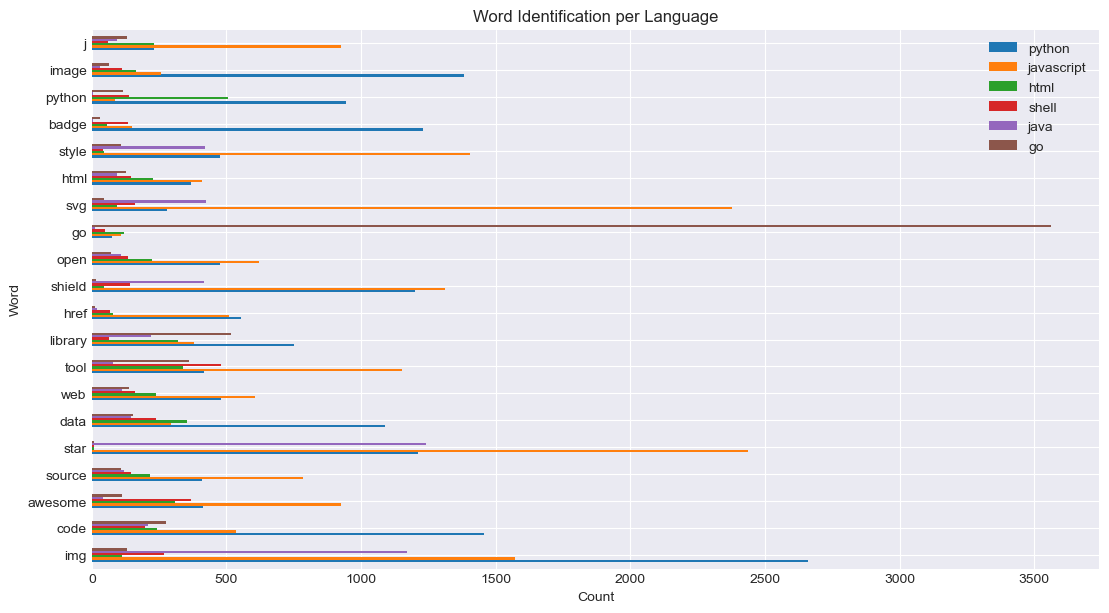

In [42]:
#visualizing the top 20 words sorted on all but only displaying the ham and spam columns
word_counts.sort_values('all', ascending=False)[1:21][['python', 'javascript', 'html', 'shell', 'java', 'go']].head(20).plot.barh()
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Word Identification per Language')
plt.show()

*Out of the top 20 words:*

Image, python, badge, data, and img identify highly with Python
<br>
J, star, img, style, and svg identify highly with JavaScript
<br>
Python and data identify with HTML
<br>
Tool, code, and img identify with Shell
<br>
Star and img identify with Java
<br>
Go uniquely identifies the language Go, kind of a freebie

## Preprocessing

In [48]:
df

,repo,language,readme
0,sindresorhus/awesome,other,div align center href http vshymanskyy standwi...
1,vinta/awesome-python,python,awesome python awesome http cdn rawgit sindres...
2,awesome-selfhosted/awesome-selfhosted,other,awesome selfhosted awesome http cdn jsdelivr n...
3,avelino/awesome-go,go,awesome go href http awesome go img align righ...
4,trimstray/the-book-of-secret-knowledge,other,p align center href http trimstray book secret...
...,...,...,...
735,hetznercloud/awesome-hcloud,other,awesome hetzner cloud curated list library too...
736,chinaBerg/awesome-canvas,other,asset logo png awesome canvas list awesome htm...
737,RichardLitt/awesome-conferences,other,awesome conference awesome http cdn rawgit sin...
738,styfle/awesome-desktop-js,other,img width height src http cdn jsdelivr net npm...


In [62]:
word_counts

,all,python,javascript,html,shell,java,go,other
http,216403,13261,11087,5400,6164,2811,4422,173258
img,22653,2659,1573,112,268,1171,131,16739
code,14546,1457,534,242,198,209,276,11630
awesome,13657,412,926,309,369,43,113,11485
source,12573,408,783,217,146,121,107,10791
...,...,...,...,...,...,...,...,...
pastebin,76,6,3,0,4,0,0,63
demonstrate,76,3,1,3,0,1,0,68
degree,76,4,3,4,4,0,0,61
overhead,76,0,5,4,4,3,3,57


In [102]:
words = df.readme.str.split()[0]
len(words)

7415

In [101]:
len([word for word in words if word in keep_words])

6162

In [93]:
#make a list called keep_words
keep_words = word_counts.index.tolist()

In [ ]:
#chop out all the words not in keep_words
df.readme.apply([word for word in words if word in keep_words])

In [122]:
test = df.readme[0]
test = 'hhelo welrkjwli img'

In [129]:
def clean_readme(test):
    words = test.split()
    clean_words = [word for word in words if word in keep_words]
    clean_words = ' '.join(clean_words)
    return clean_words

In [130]:
clean_readme(test)

'img'

In [131]:
df.readme.apply(clean_readme)

0      div align center href http img width height sr...
1      awesome python awesome http cdn rawgit sindres...
2      awesome selfhosted awesome http cdn jsdelivr n...
3      awesome go href http awesome go img align righ...
4      p align center href http book secret knowledge...
                             ...                        
735    awesome hetzner cloud curated list library too...
736    asset logo png awesome canvas list awesome htm...
737    awesome conference awesome http cdn rawgit sin...
738    img width height src http cdn jsdelivr net npm...
739    awesome git hook awesome http awesome badge sv...
Name: readme, Length: 740, dtype: object

In [74]:
#add this list to the stop words to get rid of all the junk and keep the meat of the readmes....
word_counts.index.tolist()

['http',
 'img',
 'code',
 'awesome',
 'source',
 'star',
 'data',
 'web',
 'tool',
 'library',
 'href',
 'shield',
 'open',
 'go',
 'svg',
 'html',
 'style',
 'badge',
 'python',
 'image',
 'j',
 'src',
 'project',
 'net',
 'f',
 'v',
 'png',
 'using',
 'api',
 'master',
 'app',
 'pdf',
 'file',
 'based',
 'license',
 'framework',
 'system',
 'react',
 'application',
 'youtube',
 'google',
 'medium',
 'en',
 'x',
 'tr',
 'package',
 'learning',
 'book',
 'blog',
 'icon',
 'u',
 'twitter',
 'network',
 'list',
 'r',
 'use',
 'server',
 'android',
 'br',
 'free',
 'software',
 'c',
 'git',
 'paper',
 'simple',
 'language',
 'design',
 'model',
 'detail',
 'social',
 'video',
 'platform',
 'content',
 'user',
 'godoc',
 'width',
 'k',
 'cve',
 'support',
 'security',
 'height',
 'time',
 'blob',
 'developer',
 'apache',
 'wiki',
 'service',
 'javascript',
 'component',
 'resource',
 'development',
 'plugin',
 'java',
 'de',
 'li',
 'swift',
 'ai',
 'p',
 'doc',
 'build',
 'window',
 'pro

In [75]:
# make the thing
cv = CountVectorizer()

# fit the thing
# use the thing
bag_of_words = cv.fit_transform(df.readme) #everything is getting transformed on the same data set because we haven't split yet
bag_of_words

<740x187454 sparse matrix of type '<class 'numpy.int64'>'
	with 754778 stored elements in Compressed Sparse Row format>

In [77]:
bag_of_words.todense() 


matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [78]:
#this is what is happening under the hood for the countvectorizer and todense functions
bow = pd.DataFrame(bag_of_words.todense(), columns = cv.get_feature_names_out())
bow

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaa,aaaaaaaa,aaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaavly,aaaaaaaaaaiejix,...,zzuu,zzvoffp,zzy,zzz,zzzcpan,zzzgydi,zzzozk,zzzprojects,zzzsochi,zzzteph
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
736,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
